# Classification: CATS vs DOGS 
    jpeg -> GoogleNET (one module) Keras -> [0,1]
---

Import Tensorflow with Keras and Packages

In [2]:
import tensorflow as tf

In [3]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Input
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
from keras import backend as K
from keras.optimizers import SGD

In [5]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from PIL import Image

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline 

In [7]:
import os

---
### FOLDERS and CATEGORIES:

- Folders

In [8]:
datadir = 'dogVScat'
cat1 = 'dogs'
cat2 = 'cats'

- Training set

In [9]:
target = os.chdir(datadir + "/train/" + cat1)
cat_1 = os.listdir()

In [10]:
target = os.chdir("../" + cat2)
cat_2 = os.listdir()

In [11]:
print("CAT1:",len(cat_1),"CAT2:",len(cat_2), "TOTAL:",len(cat_1)+len(cat_2))

CAT1: 5501 CAT2: 6054 TOTAL: 11555


- Validation set

In [12]:
target = os.chdir("../../validation/" + cat1)
cat_1_val = os.listdir()

In [13]:
target = os.chdir("../" + cat2)
cat_2_val = os.listdir()

In [14]:
print("CAT1:",len(cat_1_val),"CAT2:",len(cat_2_val), "TOTAL:",len(cat_1_val)+len(cat_2_val))

CAT1: 1302 CAT2: 1500 TOTAL: 2802


- Return to Home

In [15]:
os.chdir("../../../")

---
### HYPER PARAMETERS:

- Dimensions
- Epochs
- Batch
- Directories
- Learning Rate
- Decadimento 
- Momento

In [16]:
### CNN 

img_width, img_height = 300, 300

data_dir = 'dogVScat'
train_data_dir = data_dir + '/train'
validation_data_dir = data_dir + '/validation'
test_data_dir = data_dir + '/test'

nb_train_samples = len(cat_1)+len(cat_2)
nb_validation_samples = len(cat_1_val)+len(cat_2_val)
epochs = 2                                                # 50
batch_size = 32                                           # 16

In [17]:
### INCEPTION

lrate = 0.01
decay = lrate/epochs
momentum = 0.9

---
### CNN MODEL:

- Input Layer

In [18]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

- Sequential Layers Architecture

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [20]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

- Inception Layers Architecture

In [21]:
input_image = Input(shape = input_shape)

In [21]:
'''
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_image)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_image)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_image)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)
output = Flatten()(output)
out = Dense(1, activation='sigmoid')(output)
'''

In [30]:
depth_cnn = 32  
# depth_cnn = 64

In [31]:
# REWRITE with separated activation function 

tower_1 = Conv2D(depth_cnn, (1,1), padding='same')(input_image)
tower_1 = Activation('relu')(tower_1)
tower_1 = Conv2D(depth_cnn, (3,3), padding='same')(tower_1)
tower_1 = Activation('relu')(tower_1)

tower_2 = Conv2D(depth_cnn, (1,1), padding='same')(input_image)
tower_2 = Activation('relu')(tower_2)
tower_2 = Conv2D(depth_cnn, (5,5), padding='same')(tower_2)
tower_2 = Activation('relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_image)
tower_3 = Conv2D(depth_cnn, (1,1), padding='same')(tower_3)
tower_3 = Activation('relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

output = Flatten()(output)
out = Dropout(0.5)(output)
out = Dense(1)(out)
out = Activation('sigmoid')(out)

In [32]:
model_inc = Model(inputs=input_image, outputs=out)
print(model_inc.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 300, 300, 32) 128         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 300, 300, 32) 128         input_1[0][0]                    
__________________________________________________________________________________________________
activation_12 (Activation)      (None, 300, 300, 32) 0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
activation

In [23]:
sgd = SGD(lr=lrate, momentum=momentum, decay=decay, nesterov=False)

In [24]:
sgd.get_config()

{'lr': 0.009999999776482582,
 'momentum': 0.8999999761581421,
 'decay': 0.004999999888241291,
 'nesterov': False}

In [25]:
#model_inc.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [33]:
model_inc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
#model_inc.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [33]:
#model_inc.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

- Data Generators

In [25]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [26]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

- Train VS Validation SET

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 11555 images belonging to 2 classes.


In [28]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2802 images belonging to 2 classes.


- Model Training 

In [35]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/2
361/361 [==============================] - 553s 2s/step - loss: 0.7353 - acc: 0.6004 - val_loss: 0.5922 - val_acc: 0.7130
Epoch 2/2
361/361 [==============================] - 548s 2s/step - loss: 0.6055 - acc: 0.6841 - val_loss: 0.5777 - val_acc: 0.7105


In [34]:
history_inc = model_inc.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/2
361/361 [==============================] - 3207s 9s/step - loss: 8.3619 - acc: 0.4741 - val_loss: 8.6100 - val_acc: 0.4599
Epoch 2/2
361/361 [==============================] - 3327s 9s/step - loss: 8.3199 - acc: 0.4781 - val_loss: 8.5237 - val_acc: 0.4653


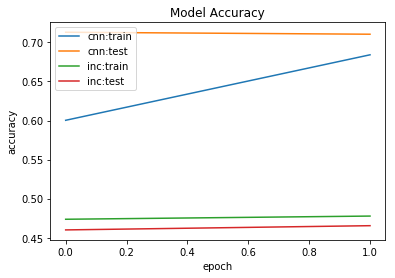

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_inc.history['acc'])
plt.plot(history_inc.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['cnn:train', 'cnn:test','inc:train', 'inc:test'], loc='upper left')
plt.show()

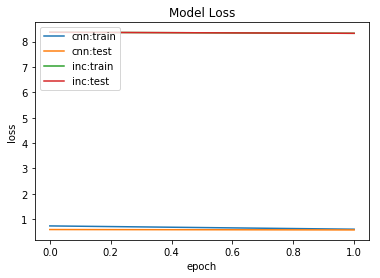

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_inc.history['loss'])
plt.plot(history_inc.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['cnn:train', 'cnn:test','inc:train', 'inc:test'], loc='upper left')
plt.show()

- Save

In [35]:
model.save_weights('keras_weights.h5')
model.save('keras_model.h5') 

In [39]:
model_inc.save_weights('keras_inc_weights.h5')
model_inc.save('keras_inc_model.h5') 